# Detection of circular object by edge detection and Hough transform for circles

In [ ]:
from collections import defaultdict
from google.colab.patches import cv2_imshow
import  matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
def plot_images(image_1, image_2, image_3):
  fig = plt.figure(1)
  fig.set_size_inches(18.5, 10.5)
  ax1, ax2, ax3 = fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)
  ax1.imshow(image_1, cmap="Greys_r")
  ax2.imshow(image_2, cmap="Greys_r")
  ax3.imshow(image_3, cmap="Greys_r")
  fig.show()

In [ ]:
def get_circle_candidates(num_thetas, min_r, max_r):
  thetas = np.arange(0, 360, step=int(360 / num_thetas))
  rs = np.arange(min_r, max_r, step=1)
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  circle_candidates = []
  for r in rs:
    for t in range(num_thetas):
      circle_candidates.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))
  return circle_candidates

def calculate_accumulator(circle_candidates, edge_image):
  img_height, img_width = edge_image.shape[:2]
  accumulator = defaultdict(int)
  for y in range(img_height):
    for x in range(img_width):
      if edge_image[y][x] != 0:
        for r, rcos_t, rsin_t in circle_candidates:
          x_center = x - rcos_t
          y_center = y - rsin_t
          accumulator[(x_center, y_center, r)] += 1
  return accumulator

def voting_circles(accumulator, num_thetas, bin_threshold):
    circles = []
    for candidate_circle, votes in sorted(accumulator.items(), key=lambda i: -i[1]):
      x, y, r = candidate_circle
      vote_percentage = votes / num_thetas
      if bin_threshold <= vote_percentage: 
        circles.append((x, y, r, vote_percentage))
    return circles

def postprocess(out_circles, pixel_threshold=5):
  postprocess_circles = []
  for x, y, r, v in out_circles:
    if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold for xc, yc, rc, v in postprocess_circles):
      postprocess_circles.append((x, y, r, v))
  return postprocess_circles

def draw_circles(image, out_circles):
  img = image.copy()
  for x, y, r, v in out_circles:
    img = cv2.circle(img, (x,y), r, (0,0,255), 2)
  return img

In [ ]:
def hough_transform_for_circles(image, edge_image,num_thetas, min_r, max_r,bin_threshold):
  
  circle_candidates = get_circle_candidates(num_thetas, min_r, max_r)

  accumulator = calculate_accumulator(circle_candidates, edge_image)
  
  preprocess_circles = voting_circles(accumulator,num_thetas, bin_threshold)

  postprocess_circles = postprocess(preprocess_circles)
      
  return draw_circles(image, postprocess_circles)

In [ ]:
def run(path,num_thetas=100, min_r=20, max_r=100, bin_threshold=0.6):
  image = cv2.imread(path)
  edged = cv2.Canny(image, 50, 150)
  circled = hough_transform_for_circles(image, edged,num_thetas, min_r, max_r, bin_threshold)
  plot_images(image, edged, circled)

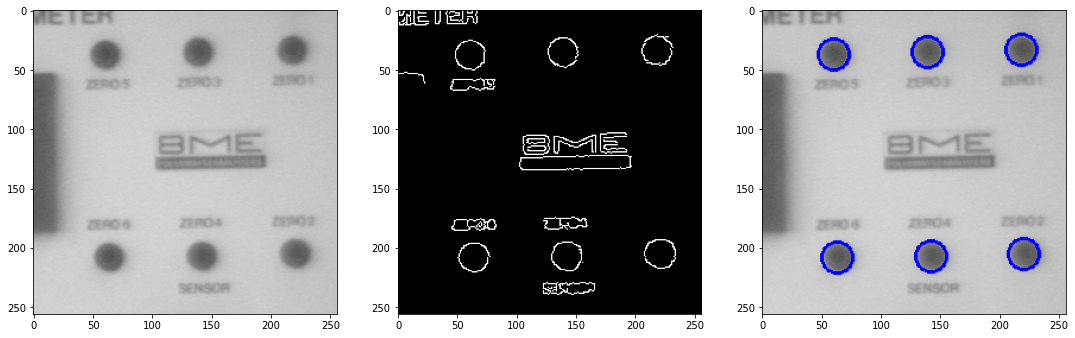

In [ ]:
run("circles.png", num_thetas=100, min_r=10, max_r=100,  bin_threshold=0.6)

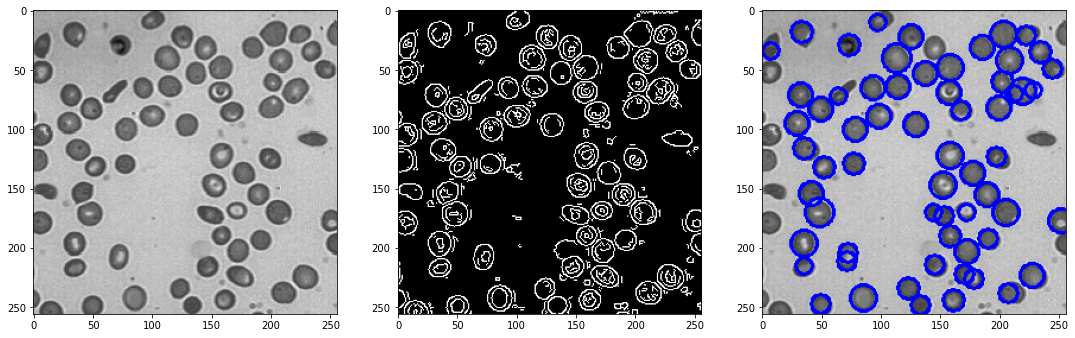

In [ ]:
run("blood.png", num_thetas=100, min_r=7, max_r=100,  bin_threshold=0.55)

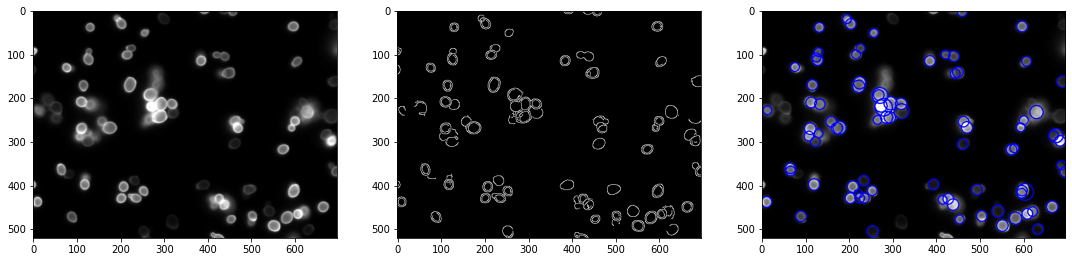

In [ ]:
run("cells.png", min_r=10, max_r=100, num_thetas=100, bin_threshold=0.4)

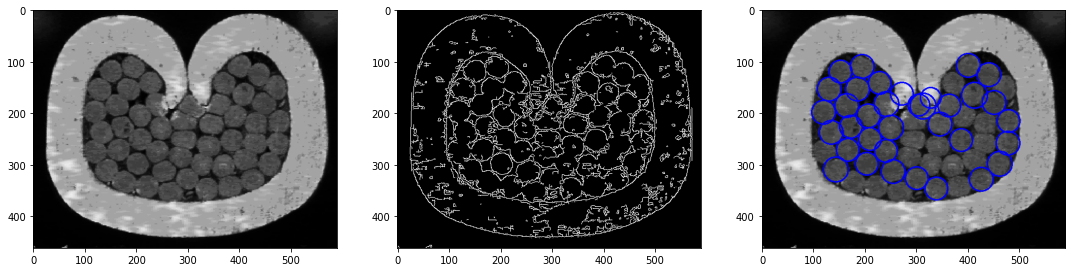

In [ ]:
run("cable.png",min_r=20, max_r=100, num_thetas=100, bin_threshold=0.4)